In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import scipy
from scipy.optimize import fmin_l_bfgs_b
from pprint import pprint

In [51]:
data = pd.read_csv('data/2013_Events.csv')
data.tail()

data = data[['Event start date','Event end date', 'Number of protesters', 'Oblast', 'Number of civilians injured', 'Number of civilians arrested']]
data['Event start date'] = pd.to_datetime(data['Event start date'])
data['Event end date'] = pd.to_datetime(data['Event end date'])
# data = data.loc[data['Event start date'] > '2013-11-15']
data = data.loc[data['Event end date'] < '2013-02-21']
data = data.sort_values(by = 'Event start date')
data = data.fillna(0)
data = data[~data.Oblast.isin(['Chernihiv',
                               'Donetsk',
                               'Dnipropetrovsk',
                               'Kharkiv',
                               'Kherson',
                               'Kirovohrad',
                               'Poltava',
                               'Sumy',
                               'Zhytomyr'
                                ])]
begin_date = "2013-01-01 00:00"
period = 324

oblasts = data['Oblast'].unique()

distributed_data = pd.DataFrame({'event_date':[], 'day':[], 'Number of protesters':[], 'Number of events': [], 'oblast': [], 'Number of civilians arrested': [], 'Number of civilians injured':[] })

for ob in oblasts:
    print(ob)
    distributed_data_ob = pd.DataFrame( {'event_date': pd.date_range(begin_date, periods=period), 
                                            'day': [i for i in range(0, period)], 
                                            'Number of protesters': [0 for i in range(0, period)], 
                                            'Number of events': [0 for i in range(0, period)],
                                            'oblast': [ob for i in range(0, period)],
                                            'Number of civilians arrested': [0 for i in range(0, period)],
                                            'Number of civilians injured': [0 for i in range(0, period)]
                                        })
    
    start_day_list =  data.loc[data['Oblast'] == ob]['Event start date'].tolist()
    end_day_list = data.loc[data['Oblast'] == ob]['Event end date'].tolist()
    prot_num = data.loc[data['Oblast'] == ob]['Number of protesters'].tolist()
    inj_num = data.loc[data['Oblast'] == ob]['Number of civilians injured'].tolist()
    arr_num = data.loc[data['Oblast'] == ob]['Number of civilians arrested'].tolist()
    for i in range(0, len(start_day_list)):
        diff = end_day_list[i] - start_day_list[i]   
        if diff == timedelta(0):
            distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i]), 'Number of protesters'] = distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i]), 'Number of protesters'] + prot_num[i]
            distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i]), 'Number of civilians injured'] = distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i]), 'Number of civilians injured'] + inj_num[i]
            distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i]), 'Number of civilians arrested'] = distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i]), 'Number of civilians arrested'] + arr_num[i]
            distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i]), 'Number of events'] = distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i]), 'Number of events'] + 1
        else:
            for j in range(0, diff.days+1):
                distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i] + timedelta(j)), 'Number of protesters'] = distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i] + timedelta(j)), 'Number of protesters'] + prot_num[i]
                distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i] + timedelta(j)), 'Number of civilians injured'] = distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i] + timedelta(j)), 'Number of civilians injured'] + inj_num[i]
                distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i] + timedelta(j)), 'Number of civilians arrested'] = distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i] + timedelta(j)), 'Number of civilians arrested'] + arr_num[i]
                distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i] + timedelta(j)), 'Number of events'] = distributed_data_ob.loc[(distributed_data_ob.event_date== start_day_list[i] + timedelta(j)), 'Number of events'] + 1
       
                
    distributed_data = distributed_data.append(distributed_data_ob, ignore_index=True)

distributed_data


Cherkasy
Ivano-Frankivsk
Zaporizhzhia
Kyiv


C:\Users\yassin\AppData\Local\Temp\ipykernel_19616\54389156.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distributed_data = distributed_data.append(distributed_data_ob, ignore_index=True)
C:\Users\yassin\AppData\Local\Temp\ipykernel_19616\54389156.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distributed_data = distributed_data.append(distributed_data_ob, ignore_index=True)
C:\Users\yassin\AppData\Local\Temp\ipykernel_19616\54389156.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distributed_data = distributed_data.append(distributed_data_ob, ignore_index=True)
C:\Users\yassin\AppData\Local\Temp\ipykernel_19616\54389156.py:59: FutureWarning: The frame.append method is deprecated and will be removed from 

Uzhhorod
Luhansk
Lviv
Ternopil
Odesa


C:\Users\yassin\AppData\Local\Temp\ipykernel_19616\54389156.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distributed_data = distributed_data.append(distributed_data_ob, ignore_index=True)
C:\Users\yassin\AppData\Local\Temp\ipykernel_19616\54389156.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distributed_data = distributed_data.append(distributed_data_ob, ignore_index=True)
C:\Users\yassin\AppData\Local\Temp\ipykernel_19616\54389156.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distributed_data = distributed_data.append(distributed_data_ob, ignore_index=True)
C:\Users\yassin\AppData\Local\Temp\ipykernel_19616\54389156.py:59: FutureWarning: The frame.append method is deprecated and will be removed from 

Rivne
Crimea
Mykolaiv
Khmelnytskyi
Chernivtsi
Vinnytsia
Lutsk
Ukraine
RIvne


C:\Users\yassin\AppData\Local\Temp\ipykernel_19616\54389156.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distributed_data = distributed_data.append(distributed_data_ob, ignore_index=True)
C:\Users\yassin\AppData\Local\Temp\ipykernel_19616\54389156.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distributed_data = distributed_data.append(distributed_data_ob, ignore_index=True)
C:\Users\yassin\AppData\Local\Temp\ipykernel_19616\54389156.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distributed_data = distributed_data.append(distributed_data_ob, ignore_index=True)
C:\Users\yassin\AppData\Local\Temp\ipykernel_19616\54389156.py:59: FutureWarning: The frame.append method is deprecated and will be removed from 

,event_date,day,Number of protesters,Number of events,oblast,Number of civilians arrested,Number of civilians injured
0,2013-01-01,0.0,31.0,1.0,Cherkasy,0.0,0.0
1,2013-01-02,1.0,0.0,0.0,Cherkasy,0.0,0.0
2,2013-01-03,2.0,0.0,0.0,Cherkasy,0.0,0.0
3,2013-01-04,3.0,0.0,0.0,Cherkasy,0.0,0.0
4,2013-01-05,4.0,0.0,0.0,Cherkasy,0.0,0.0
...,...,...,...,...,...,...,...
5827,2013-11-16,319.0,0.0,0.0,RIvne,0.0,0.0
5828,2013-11-17,320.0,0.0,0.0,RIvne,0.0,0.0
5829,2013-11-18,321.0,0.0,0.0,RIvne,0.0,0.0
5830,2013-11-19,322.0,0.0,0.0,RIvne,0.0,0.0


In [52]:
avg_per_oblast = distributed_data[['oblast', 'Number of events']].groupby(['oblast']).mean().reset_index()
avg_per_oblast_dict = {}
for i in range(0, len(avg_per_oblast['oblast'].to_list())):
    ob = avg_per_oblast['oblast'].to_list()[i]
    avg_per_oblast_dict[ob] = avg_per_oblast['Number of events'].to_list()[i]
avg_per_oblast_dict

{'Cherkasy': 0.030864197530864196,
 'Chernivtsi': 0.05864197530864197,
 'Crimea': 0.15123456790123457,
 'Ivano-Frankivsk': 0.06481481481481481,
 'Khmelnytskyi': 0.012345679012345678,
 'Kyiv': 0.4660493827160494,
 'Luhansk': 0.046296296296296294,
 'Lutsk': 0.021604938271604937,
 'Lviv': 0.16049382716049382,
 'Mykolaiv': 0.16666666666666666,
 'Odesa': 0.14814814814814814,
 'RIvne': 0.0030864197530864196,
 'Rivne': 0.027777777777777776,
 'Ternopil': 0.040123456790123455,
 'Ukraine': 0.009259259259259259,
 'Uzhhorod': 0.033950617283950615,
 'Vinnytsia': 0.024691358024691357,
 'Zaporizhzhia': 0.04938271604938271}

## Actual Model:

In [53]:
data_raw = pd.read_csv('data/event_13_cleaned_distributed_with_oblasts_injured.csv')

data_raw

##labeling ukraine as kyiv

data_raw.loc[(data_raw.oblast == 'Ukraine'),'oblast'] = 'Kyiv'


data_raw = data_raw.groupby(['oblast', 'event_date', 'day']).sum().reset_index()


##windowing
#data = data_raw
data = data_raw.loc[data_raw['day'] <= 45]
data = data.loc[data_raw['day'] != 0]
data['day'] = data['day']-1
data = data.loc[data['oblast'] != 'Crimea']

data = data.sort_values(['oblast', 'day'])
data






# Weighted centroid by population?

oblast_coords = {'Cherkasy':[49.4444, 32.0598], 'Chernihiv':[51.4982, 31.2893], 'Chernivtsi':[48.2917, 25.9352],
                 'Crimea':[45.3453, 34.4997], 'Dnipropetrovsk':[48.4647, 35.0462],
                 'Donetsk':[48.0159, 37.8028], 'Ivano-Frankivsk':[48.9226, 24.7111],
                 'Kharkiv':[49.9935, 36.2304], 'Kherson':[46.6354, 32.6169],
                 'Khmelnytskyi':[49.4230, 26.9871], 'Kirovohrad':[48.5079, 32.2623],
                 'Kyiv':[50.0530, 30.7667], 'Luhansk':[48.5740, 39.3078],
                 'Lutsk':[50.7472, 25.3254], 'Lviv':[49.8397, 24.0297],
                 'Mykolaiv':[46.9750, 31.9946], 'Odesa':[46.4846, 30.7326],
                 'Poltava':[49.5883, 34.5514], 'Rivne':[50.6199, 26.2516],
                 'Sumy':[50.9077, 34.7981], 'Ternopil':[49.5535, 25.5948],
                 'Uzhhorod':[48.6208, 22.2879], 'Vinnytsia':[49.2331, 28.4682],
                 'Zaporizhzhia':[47.8388, 35.1396], 'Zhytomyr':[50.2547, 28.6587],
                'Ukraine': [0,0]}


## Defining Distance function
def Wij(i,j,c, d):
    ### i and j are strings oblast names
    if i == j:
        return 1
    if i == 'Ukraine' or j == 'Ukraine':
        dist = 0
    else:
        dist = np.sqrt( (oblast_coords[i][0] - oblast_coords[j][0])**2 + (oblast_coords[i][1] - oblast_coords[j][1])**2)
    return d/(dist + 1)**c

oblasts = data['oblast'].unique()
oblasts


population_oblast_dict = {
                            'Cherkasy':1246166, 
                            'Chernihiv':1047023, 
                            'Chernivtsi':910001,
                            'Crimea':1963770, 
                            'Dnipropetrovsk': 3258705,
                            'Donetsk': 4387702,
                            'Ivano-Frankivsk': 1382721,
                            'Kharkiv': 2720342,
                            'Kherson': 1063803,
                            'Khmelnytskyi': 1296103, 
                            'Kirovohrad': 974724,
                            'Kyiv': 2900920 + 1731673, 
                            'Luhansk': 2263676,
                            'Lutsk': 1042855,  ## Only a city, oblast Volyn city pop 217,197
                            'Lviv': 2535476,
                            'Mykolaiv': 1159634,
                            'Odesa': 2387282,
                            'Poltava': 1440684,
                            'Rivne': 1162049,
                            'Sumy': 1115051,
                            'Ternopil': 1066523,
                            'Uzhhorod': 1259497, ## Only a city, oblast Zakarpattia city pop 115,542
                            'Vinnytsia': 1604270,
                            'Zaporizhzhia':1755663, 
                            'Zhytomyr': 1249225,
                            'Ukraine': 0}
    

#### Oblast Sevastopol 381,685 not present



## get total population
total_pop = 0
for ob in population_oblast_dict.keys():
    total_pop += population_oblast_dict[ob]

population_oblast_dict['Ukraine'] = total_pop

population_oblast_dict

EU_vote = {'Cherkasy':0.5461, 
                            'Chernihiv':0.4481, 
                            'Chernivtsi':0.5672,
                            'Crimea':0, 
                            'Dnipropetrovsk': 0.4472,
                            'Donetsk': 0.3615,
                            'Ivano-Frankivsk': 0.6513,
                            'Kharkiv': 0.3528,
                            'Kherson': 0.4871,
                            'Khmelnytskyi': 0.5626, 
                            'Kirovohrad': 0.5096,
                            'Kyiv': 0.6410, 
                            'Luhansk': 0.3317,
                            'Lutsk': 0.5241,  ## Only a city, oblast Volyn city pop 217,197
                            'Lviv': 0.6992,
                            'Mykolaiv': 0.4597,
                            'Odesa': 0.4178,
                            'Poltava': 0.5455,
                            'Rivne': 0.5546,
                            'Sumy': 0.5541,
                            'Ternopil': 0.6063,
                            'Uzhhorod': 0.622, ## Only a city, oblast Zakarpattia city pop 115,542
                            'Vinnytsia': 0.6732,
                            'Zaporizhzhia':0.3815, 
                            'Zhytomyr': 0.5864,
            }

Ukraine_votes = 0.5470

eu_vote_scaler = {}

for ob in oblasts:
    
    eu_vote_scaler[ob] = EU_vote[ob]/Ukraine_votes

eu_vote_scaler

pop_rat = {}

for ob in oblasts:
    pop_rat[ob] = population_oblast_dict[ob]/population_oblast_dict['Ukraine']
pop_rat





## exclusion:
data = data[~data.oblast.isin(['Chernihiv',
                               'Donetsk',
                               'Dnipropetrovsk',
                               'Kharkiv',
                               'Kherson',
                               'Kirovohrad',
                               'Poltava',
                               'Sumy',
                               'Zhytomyr'
                                ])]

data['Number of civilians arrested'] = data['Number of civilians arrested']+1
data['Number of civilians injured'] = data['Number of civilians injured']+1
data['Number of civilians arrested'] = (data['Number of civilians arrested']  - data['Number of civilians arrested'].min())/(data['Number of civilians arrested'].max()-data['Number of civilians arrested'].min()) + 1
data['Number of civilians injured'] = (data['Number of civilians injured'] - data['Number of civilians injured'].min())/(data['Number of civilians injured'].max()-data['Number of civilians injured'].min()) + 1
data



,oblast,event_date,day,Number of protesters,Number of events,Number of civilians arrested,Number of civilians injured
1,Cherkasy,2013-11-21,0.0,12.0,3.0,1.0,1.000000
2,Cherkasy,2013-11-22,1.0,1301.0,5.0,1.0,1.000000
3,Cherkasy,2013-11-23,2.0,265.0,6.0,1.0,1.005319
4,Cherkasy,2013-11-24,3.0,821.0,3.0,1.0,1.000000
5,Cherkasy,2013-11-25,4.0,701.0,7.0,1.0,1.000000
...,...,...,...,...,...,...,...
2157,Zaporizhzhia,2013-12-31,40.0,0.0,0.0,1.0,1.000000
2158,Zaporizhzhia,2014-01-01,41.0,0.0,0.0,1.0,1.000000
2159,Zaporizhzhia,2014-01-02,42.0,0.0,0.0,1.0,1.000000
2160,Zaporizhzhia,2014-01-03,43.0,0.0,0.0,1.0,1.000000


In [54]:
oblasts = data['oblast'].unique()


days = list(data['day'].unique())
data_array = np.zeros((len(days),len(oblasts)))

for i in range(0, len(oblasts)):
    data_array[:, i] = np.array(data.loc[data['oblast'] == oblasts[i]]['Number of events'])

data_array.shape

(45, 15)

## 2010 Votes Instead:

In [55]:
# votedf = pd.DataFrame({"vote":[1-0.547, 
#                                         1-0.636, 
#                                         1- 0.665,
#                                         0.782, 
#                                         0.627,
#                                         0.904,
#                                         1-0.889,
#                                         0.714,
#                                         0.6,
#                                         1-0.697, 
#                                         0.547,
#                                         1-0.697, 
#                                         0.89,
#                                         1-0.819,  
#                                         1-0.862,
#                                         0.715,
#                                         0.741,
#                                         1-0.542,
#                                         1-0.762,
#                                         1-0.629,
#                                         0.884,
#                                         1-0.547, 
#                                         1-0.711,
#                                         0.715, 
#                                         1-0.575],
#                                         "oblast":  ['Cherkasy'       ,
#                                                     'Chernihiv'      ,
#                                                     'Chernivtsi'     ,
#                                                     'Crimea'         ,
#                                                     'Dnipropetrovsk' ,
#                                                     'Donetsk'        ,
#                                                     'Ivano-Frankivsk',
#                                                     'Kharkiv'        ,
#                                                     'Kherson'        ,
#                                                     'Khmelnytskyi'   ,
#                                                     'Kirovohrad'     ,
#                                                     'Kyiv'           ,
#                                                     'Luhansk'        ,
#                                                     'Lutsk'          ,
#                                                     'Lviv'           ,
#                                                     'Mykolaiv'       ,
#                                                     'Odesa'          ,
#                                                     'Poltava'        ,
#                                                     'Rivne'          ,
#                                                     'Sumy'           ,
#                                                     'Ternopil'       ,
#                                                     'Uzhhorod'       ,
#                                                     'Vinnytsia'      ,
#                                                     'Zaporizhzhia'   ,
#                                                     'Zhytomyr'       

#                                                     ]})

# votedf['vote'] = 1 - votedf['vote']
# Ukraine_votes = 1-0.4895

# eu_vote_scaler = {}

# for ob in oblasts:
    
#     eu_vote_scaler[ob] =votedf[votedf['oblast'] == ob]['vote'].to_list()[0]/Ukraine_votes

In [56]:
N0 = []
for ob in oblasts:
    N0 += [avg_per_oblast_dict[ob]]
N0

[0.030864197530864196,
 0.05864197530864197,
 0.06481481481481481,
 0.012345679012345678,
 0.4660493827160494,
 0.046296296296296294,
 0.021604938271604937,
 0.16049382716049382,
 0.16666666666666666,
 0.14814814814814814,
 0.027777777777777776,
 0.040123456790123455,
 0.033950617283950615,
 0.024691358024691357,
 0.04938271604938271]

In [57]:
class Hawkes():
    def __init__(self, spike_times, initial_state, hk_func, loss_func):
        self.spike_times = spike_times
        self.initial_state = initial_state
        self.Hawkes = hk_func
        self.loss = loss_func

In [58]:
def Nevents(data_arr, spike_times, Nsec, Tex, c, d, p):
    N_array = np.zeros(data_arr.shape)
    
    N_array[0,:] = data_arr[0,:]
    
    W_matrix = np.zeros((len(oblasts), len(oblasts)))
    for i in range(0,len(oblasts)):
        for j in range(0, len(oblasts)):
            if i !=j:
                W_matrix[i,j] = Wij(oblasts[i],oblasts[j],c, d)
    
    pop_arr = np.array([pop_rat[oblasts[i]] for i in range(0, len(oblasts))])
    eu_vote_arr = np.array([eu_vote_scaler[oblasts[i]] for i in range(0, len(oblasts))])
    
    popvote_multiplied = np.multiply(pop_arr, eu_vote_arr)
    
    injured = np.zeros(data_arr.shape)
    for i in range(0,len(oblasts)):
        dt_injr = np.array(data[data['oblast'] == oblasts[i]]['Number of civilians injured'].tolist())
        injured[:,i] = dt_injr
    injured = injured**p
    
    kernel = np.zeros(data_arr.shape[0])
    for i in range(1,len(kernel)):
        for j in range(0, len(spike_times)):
            if i>spike_times[j]:
                kernel[i] += np.exp(-(i-spike_times[j])/Tex)
    kernel = Nsec*kernel

#     print('pop', popvote_multiplied)
    # print('popker', N0 +  popvote_multiplied*kernel[1])
    for d in range(1, data_arr.shape[0]):
        # N_array[d,:] = injured[d,:]*(N0 + popvote_multiplied*kernel[i]) #+ popvote_multiplied*np.dot(N_array[d,:], W_matrix))
        N_array[d,:] = injured[d,:]*(N0 + popvote_multiplied*kernel[d]+ popvote_multiplied*np.dot(N_array[d-1,:], W_matrix))

    return N_array

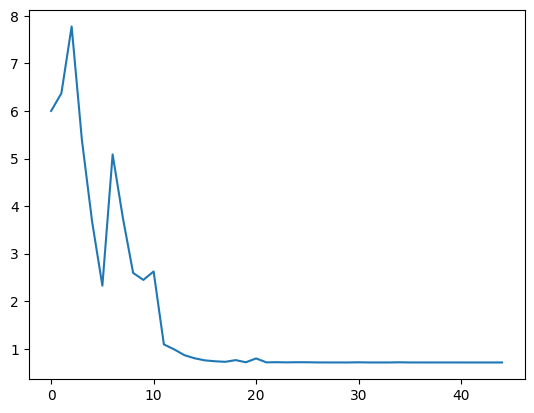

In [59]:

spike_times = np.array([0, 1, 5])

Nsec = 100
Tex = 0.8
c = 1
d = 5
p = 1
blind_run = Nevents(data_array, spike_times, Nsec, Tex, c, d, p)
# print('run', blind_run[:,])
plt.plot(days, blind_run[:,4])


In [60]:
def loglike(data_arr, Nexp_func, spike_times, Nsec, Tex, c, d, p):
    
    # print(data_arr)
    N_expected = Nexp_func(data_arr, spike_times, Nsec, Tex, c, d, p)
    # print(data_arr[0,:]- N_expected[0,:])
    
    negative_lg_liklihood = 0
    
    for i in range(0,N_expected.shape[0]):
        for j in range(0,N_expected.shape[1]):
            if N_expected[i,j] != 0:
                negative_lg_liklihood += N_expected[i,j] - data_arr[i,j]*np.log(N_expected[i,j])
    return(negative_lg_liklihood)
def loglike_minimize(param):
    return loglike(data_array, Nevents, spike_times, param[0], param[1], param[2], param[3], param[4])

In [61]:
loglike(data_array, Nevents, spike_times, Nsec, Tex, c, d, p)

2235.075644433689

In [62]:
def square_diff(data_arr, Nexp_func, spike_times, Nsec, Tex, c, d, p):

    N_expected = Nexp_func(data_arr, spike_times, Nsec, Tex, c, d, p)

    diff = (N_expected - data_array)**2
    
    return np.sum(diff)
square_diff(data_array, Nevents, spike_times, Nsec, Tex, c, d, p)
def square_diff_minimize(param):
    return square_diff(data_array, Nevents, spike_times, param[0], param[1], param[2], param[3], param[4])

# Getting Spiketimes:

In [63]:
num_events = data.groupby(['day']).sum().reset_index()['Number of events'].to_list()

C:\Users\yassin\AppData\Local\Temp\ipykernel_19616\2906406443.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  num_events = data.groupby(['day']).sum().reset_index()['Number of events'].to_list()


## on day difference:

In [64]:
spiketimes1day = []
for i in range(1, len(num_events)):
    if num_events[i] > num_events[i-1]:
        spiketimes1day = spiketimes1day + [i]
spiketimes1day

[1, 3, 5, 6, 10, 11, 17, 18, 20, 24, 26, 28, 29, 31, 34, 35, 38]

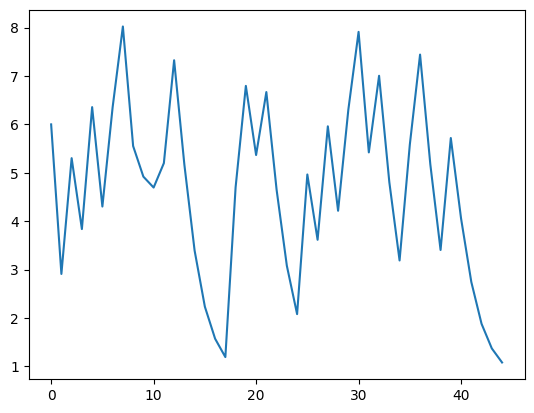

In [65]:


Nsec = 100
Tex = 0.8
c = 1
d = 5
p = 1
blind_run = Nevents(data_array, spiketimes1day, Nsec, Tex, c, d, p)
# print('run', blind_run[:,])
plt.plot(days, blind_run[:,4])

In [66]:

def loglike_minimize(param):
    return loglike(data_array, Nevents, spiketimes1day, param[0], param[1], param[2], param[3], param[4])

In [67]:

Nsec = 100
Tex = 0.8
c = 1
d = 0
p = 1
param = [Nsec, Tex, c, d, p]

loglike_minimize(param)
N_sec_bound, T_ex_bound, A_bound, c_bound, d_bound, tsbound, p_bound = (1, 200), (0, 300), (0,1), (0, 10), (0,100), (1,10), (0,10)


bd_array = np.array([N_sec_bound, T_ex_bound, c_bound, d_bound, p_bound])


sol = fmin_l_bfgs_b(loglike_minimize,
                     param,
                     approx_grad=True,
                     bounds=bd_array,
                     epsilon=1e-08,
                     maxfun=4000)
Sol = sol[0]
loglike_minimize(Sol)

C:\Users\yassin\AppData\Local\Temp\ipykernel_19616\3013314029.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  kernel[i] += np.exp(-(i-spike_times[j])/Tex)


-1411.444612891255

In [68]:
Sol

array([99.82028424,  0.63312032,  0.15442331,  2.02063785,  3.87972435])

In [69]:
# N0 = 3.25

# [Nsec, Tex , c, d, p] = sol[0]



# #print(Nexp_opti(data, N0, Nsec, Tex, A, c, d))
# Nexp_all = Nevents(data_array, spiketimes1day, Nsec, Tex, c, d, p)
# for ob in oblasts:
#     oblast_index = np.where(oblasts == ob)[0][0]
    
#     Nexp_ob = Nexp_all[:, oblast_index]

#     days = list(data['day'].unique())

#     plt.plot(days, data_array[:, oblast_index], marker = 'x', label = 'True Events')
#     plt.plot(days, Nexp_ob, marker = 'o', label = 'Predicted events')
#     plt.xticks(ticks = [0, 10, 20, 30, 40], labels = ['2013-11-21', '2013-12-06', 
#                                                                   '2013-12-16', '2013-12-26', '2014-01-04' 
#                                                                     ], rotation = 90)
#     plt.legend()
#     plt.title(ob)
    
#     # plt.savefig('results/distance_injured/dist_inj_'+ob+'.svg')
# #     plt.savefig('results/Kyiv dominated/kyiv_dom_'+ob+'.svg')
#     plt.show()

# middle Spiketime:



In [70]:
spiketimes3day = []
for i in range(1, len(num_events)-1):
    if num_events[i] > num_events[i-1] and num_events[i] > num_events[i+1] :
        spiketimes3day = spiketimes3day + [i]
spiketimes3day

[1, 3, 6, 11, 18, 20, 24, 26, 29, 31, 35, 38]

In [71]:

def loglike_minimize(param):
    return loglike(data_array, Nevents, spiketimes3day, param[0], param[1], param[2], param[3], param[4])

Nsec = 100
Tex = 0.8
c = 1
d = 0
p = 1
param = [Nsec, Tex, c, d, p]

loglike_minimize(param)
N_sec_bound, T_ex_bound, A_bound, c_bound, d_bound, tsbound, p_bound = (1, 200), (0, 300), (0,1), (0, 10), (0,100), (1,10), (0,10)


bd_array = np.array([N_sec_bound, T_ex_bound, c_bound, d_bound, p_bound])


sol = fmin_l_bfgs_b(loglike_minimize,
                     param,
                     approx_grad=True,
                     bounds=bd_array,
                     epsilon=1e-08,
                     maxfun=4000)
Sol = sol[0]
print(Sol, loglike_minimize(Sol))

C:\Users\yassin\AppData\Local\Temp\ipykernel_19616\3013314029.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  kernel[i] += np.exp(-(i-spike_times[j])/Tex)


[99.63349585  0.6581012   0.1415731   2.03665861  4.02597125] -1401.11922306153


In [72]:
# N0 = 3.25

# [Nsec, Tex , c, d, p] = sol[0]



# #print(Nexp_opti(data, N0, Nsec, Tex, A, c, d))
# Nexp_all = Nevents(data_array, spiketimes1day, Nsec, Tex, c, d, p)
# for ob in oblasts:
#     oblast_index = np.where(oblasts == ob)[0][0]
    
#     Nexp_ob = Nexp_all[:, oblast_index]

#     days = list(data['day'].unique())

#     plt.plot(days, data_array[:, oblast_index], marker = 'x', label = 'True Events')
#     plt.plot(days, Nexp_ob, marker = 'o', label = 'Predicted events')
#     plt.xticks(ticks = [0, 10, 20, 30, 40], labels = ['2013-11-21', '2013-12-06', 
#                                                                   '2013-12-16', '2013-12-26', '2014-01-04' 
#                                                                     ], rotation = 90)
#     plt.legend()
#     plt.title(ob)
    
#     # plt.savefig('results/distance_injured/dist_inj_'+ob+'.svg')
# #     plt.savefig('results/Kyiv dominated/kyiv_dom_'+ob+'.svg')
#     plt.show()

# Moving Magnitude:

In [73]:
def Nevents(data_arr, spike_times, Nsec, t,  Tex, c, d, p):
    N_array = np.zeros(data_arr.shape)
    
    N_array[0,:] = data_arr[0,:]
    
    W_matrix = np.zeros((len(oblasts), len(oblasts)))
    for i in range(0,len(oblasts)):
        for j in range(0, len(oblasts)):
            if i !=j:
                W_matrix[i,j] = Wij(oblasts[i],oblasts[j],c, d)
    
    pop_arr = np.array([pop_rat[oblasts[i]] for i in range(0, len(oblasts))])
    eu_vote_arr = np.array([eu_vote_scaler[oblasts[i]] for i in range(0, len(oblasts))])
    
    popvote_multiplied = np.multiply(pop_arr, eu_vote_arr)
    
    injured = np.zeros(data_arr.shape)
    for i in range(0,len(oblasts)):
        dt_injr = np.array(data[data['oblast'] == oblasts[i]]['Number of civilians injured'].tolist())
        injured[:,i] = dt_injr
    injured = injured**p
    
    kernel = np.zeros(data_arr.shape[0])
    for i in range(1,len(kernel)):
        for j in range(0, len(spike_times)):
            if i>spike_times[j]:
                kernel[i] += np.exp(-(i-spike_times[j])/Tex)
                kernel[i] = Nsec*np.exp(-(i-t)**2)*kernel[i]

    for d in range(1, data_arr.shape[0]):
        # N_array[d,:] = injured[d,:]*(N0 + popvote_multiplied*kernel[i]) #+ popvote_multiplied*np.dot(N_array[d,:], W_matrix))
        N_array[d,:] = injured[d,:]*(N0 + popvote_multiplied*kernel[d]+ popvote_multiplied*np.dot(N_array[d-1,:], W_matrix))

    return N_array

In [74]:
spiketimes1day

[1, 3, 5, 6, 10, 11, 17, 18, 20, 24, 26, 28, 29, 31, 34, 35, 38]

In [75]:
def loglike(data_arr, Nexp_func, spike_times, Nsec,t, Tex, c, d, p):
    
    # print(data_arr)
    N_expected = Nexp_func(data_arr, spike_times, Nsec, t, Tex, c, d, p)
    # print(data_arr[0,:]- N_expected[0,:])
    
    negative_lg_liklihood = 0
    
    for i in range(0,N_expected.shape[0]):
        for j in range(0,N_expected.shape[1]):
            if N_expected[i,j] != 0:
                negative_lg_liklihood += N_expected[i,j] - data_arr[i,j]*np.log(N_expected[i,j])
    return negative_lg_liklihood
def loglike_minimize(param):
    return loglike(data_array, Nevents, spiketimes1day, param[0], param[1], param[2], param[3], param[4], param[5])

In [76]:
loglike_minimize(param)

IndexError: list index out of range

In [ ]:

Nsec = 100
t = 1
Tex = 0.8
c = 1
d = 0
p = 1
v= 1
param = [Nsec, t, Tex, c, d, p]

loglike_minimize(param)
N_sec_bound, t_bound, T_ex_bound, c_bound, d_bound, p_bound = (1, 200), (0,45), (0, 300), (0, 10), (0,100), (0,10)


bd_array = np.array([N_sec_bound, t_bound, T_ex_bound, c_bound, d_bound, p_bound])


sol = fmin_l_bfgs_b(loglike_minimize,
                     param,
                     approx_grad=True,
                     bounds=bd_array,
                     epsilon=1e-08,
                     maxfun=4000)
Sol = sol[0]
print(Sol, loglike_minimize(Sol))

In [33]:
# N0 = 3.25

# [Nsec, t, Tex , c, d, p] = sol[0]



# #print(Nexp_opti(data, N0, Nsec, Tex, A, c, d))
# Nexp_all = Nevents(data_array, spiketimes1day, Nsec,t, Tex, c, d, p)
# for ob in oblasts:
#     oblast_index = np.where(oblasts == ob)[0][0]
    
#     Nexp_ob = Nexp_all[:, oblast_index]

#     days = list(data['day'].unique())

#     plt.plot(days, data_array[:, oblast_index], marker = 'x', label = 'True Events')
#     plt.plot(days, Nexp_ob, marker = 'o', label = 'Predicted events')
#     plt.xticks(ticks = [0, 10, 20, 30, 40], labels = ['2013-11-21', '2013-12-06', 
#                                                                   '2013-12-16', '2013-12-26', '2014-01-04' 
#                                                                     ], rotation = 90)
#     plt.legend()
#     plt.title(ob)
    
#     # plt.savefig('results/distance_injured/dist_inj_'+ob+'.svg')
# #     plt.savefig('results/Kyiv dominated/kyiv_dom_'+ob+'.svg')
#     plt.show()

# Average spike of all oblasts:


In [77]:
def sigmoid(x):
    return np.round(1/(1+np.exp(-x)))

In [78]:
is_spiking = []
diff_spiking = []
for ob in range(0, data_array.shape[1]):
    ob_spike = []
    ob_diff = []
    for i in range(1, data_array.shape[0]):
        ob_diff = ob_diff + [data_array[i, ob] - data_array[i-1, ob]]
        if data_array[i, ob] - data_array[i-1, ob] <0:
            ob_spike= ob_spike + [-1]
        else:
            ob_spike= ob_spike + [1]
    is_spiking = is_spiking + [ob_spike]
    diff_spiking = diff_spiking +  [ob_diff]
is_spiking = np.array(is_spiking)
diff_spiking = np.array(diff_spiking)

In [79]:
sigm = sigmoid(diff_spiking.sum(axis = 0)/is_spiking.shape[0])
sigm

array([1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [80]:

sigavgspikes = []

for i in range(0, len(sigm)):
    if sigm[i] == 1:
        sigavgspikes += [i]


In [120]:
def Nevents(data_arr, spike_times, Nsec, t,  Tex, c, d, p):
    N_array = np.zeros(data_arr.shape)
    
    N_array[0,:] = data_arr[0,:]
    
    pop_arr = np.array([pop_rat[oblasts[i]] for i in range(0, len(oblasts))])
    eu_vote_arr = np.array([eu_vote_scaler[oblasts[i]] for i in range(0, len(oblasts))])
    
    W_matrix = np.zeros((len(oblasts), len(oblasts)))
    for i in range(0,len(oblasts)):
        for j in range(0, len(oblasts)):
            if i !=j:
                W_matrix[i,j] = Wij(oblasts[i],oblasts[j],c, d)
                W_matrix[i,j] = d/(np.sqrt((eu_vote_arr[i]-eu_vote_arr[j])**2)+1)**c
    
    popvote_multiplied = np.multiply(pop_arr, eu_vote_arr)
    
    injured = np.zeros(data_arr.shape)
    for i in range(0,len(oblasts)):
        dt_injr = np.array(data[data['oblast'] == oblasts[i]]['Number of civilians injured'].tolist())
        injured[:,i] = dt_injr
    injured = injured**p
    
    kernel = np.zeros(data_arr.shape[0])
    for i in range(1,len(kernel)):
        for j in range(0, len(spike_times)):
            if i>spike_times[j]:
                kernel[i] += np.exp(-(i-spike_times[j])/Tex)
                kernel[i] = Nsec*np.exp(-(i-t)**2)*kernel[i]

    for d in range(1, data_arr.shape[0]):
        # N_array[d,:] = injured[d,:]*(N0 + popvote_multiplied*kernel[i]) #+ popvote_multiplied*np.dot(N_array[d,:], W_matrix))
        N_array[d,:] = N0 + injured[d,:]*(popvote_multiplied*kernel[d]+popvote_multiplied*np.dot(N_array[d-1,:], W_matrix))

    return N_array
def loglike(data_arr, Nexp_func, spike_times, Nsec,t, Tex, c, d, p):
    
    # print(data_arr)
    N_expected = Nexp_func(data_arr, spike_times, Nsec, t, Tex, c, d, p)
    # print(data_arr[0,:]- N_expected[0,:])
    
    negative_lg_liklihood = 0
    
    for i in range(0,N_expected.shape[0]):
        for j in range(0,N_expected.shape[1]):
            if N_expected[i,j] != 0:
                negative_lg_liklihood += N_expected[i,j] - data_arr[i,j]*np.log(N_expected[i,j])
    return negative_lg_liklihood
def loglike_minimize(param):
    return loglike(data_array, Nevents, spiketimes1day, param[0], param[1], param[2], param[3], param[4], param[5])

In [121]:

Nsec = 100
t = 1
Tex = 0.8
c = 1
d = 0
p = 1
v= 1

param = [Nsec, t, Tex, c, d, p]

loglike_minimize(param)
N_sec_bound, t_bound, T_ex_bound, c_bound, d_bound, p_bound = (1, 200), (0,45), (0, 300), (0, 10), (0,100), (0,10)


bd_array = np.array([N_sec_bound, t_bound, T_ex_bound, c_bound, d_bound, p_bound])


sol = fmin_l_bfgs_b(loglike_minimize,
                     param,
                     approx_grad=True,
                     bounds=bd_array,
                     epsilon=1e-08,
                     maxfun=4000)
Sol = sol[0]
print(Sol, loglike_minimize(Sol))

[100.08771958   2.34646722   3.78705906   2.40322042   2.63132081
   2.37500593] -1636.828050786982


In [ ]:


[Nsec, t, Tex , c, d, p] = sol[0]



#print(Nexp_opti(data, N0, Nsec, Tex, A, c, d))
Nexp_all = Nevents(data_array, spiketimes1day, Nsec,t, Tex, c, d, p)
for ob in oblasts:
    oblast_index = np.where(oblasts == ob)[0][0]
    
    Nexp_ob = Nexp_all[:, oblast_index]

    days = list(data['day'].unique())

    plt.plot(days, data_array[:, oblast_index], marker = 'x', label = 'True Events')
    plt.plot(days, Nexp_ob, marker = 'o', label = 'Predicted events')
    plt.xticks(ticks = [0, 10, 20, 30, 40], labels = ['2013-11-21', '2013-12-06', 
                                                                  '2013-12-16', '2013-12-26', '2014-01-04' 
                                                                   ], rotation = 90)
    plt.ylabel('# of events')
    plt.legend()
    plt.title(ob)
    
    plt.savefig('results/oblast prediction/prediction'+ob+'.png')
    plt.show()

# SpatioTEmporal spread:

In [102]:
evendate =  data['event_date'].to_list()

C:\Users\yassin\AppData\Local\Temp\ipykernel_19616\318484010.py:113: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


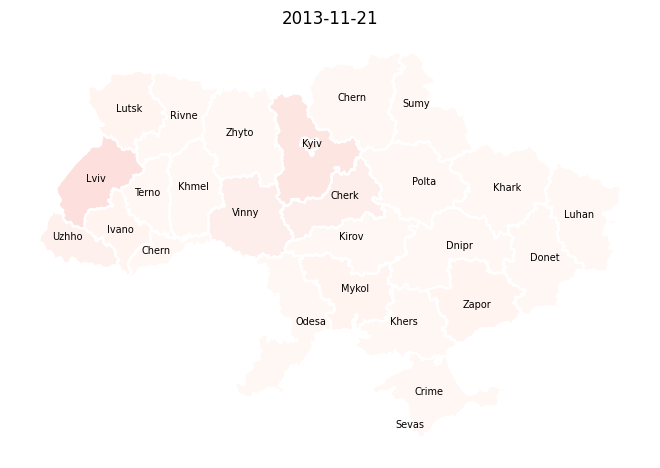

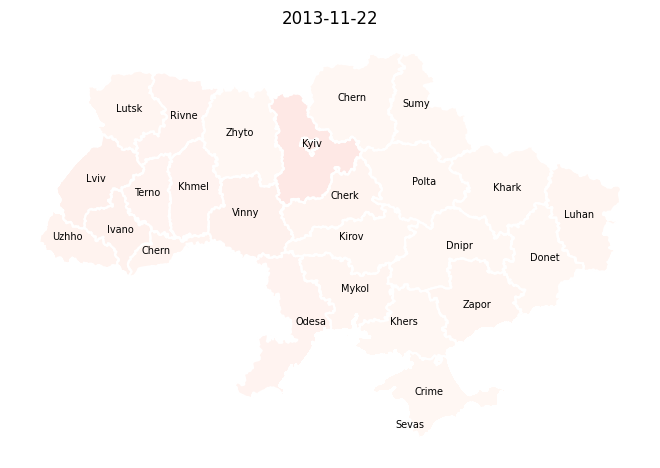

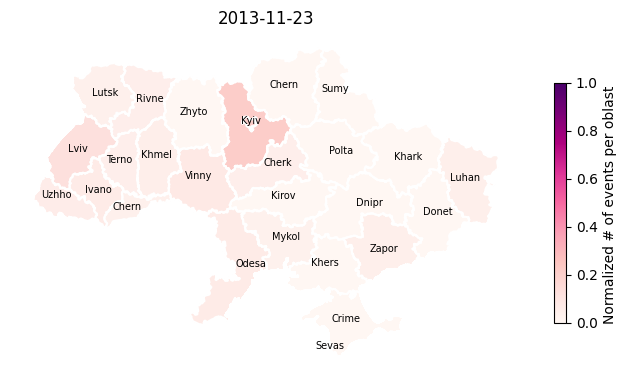

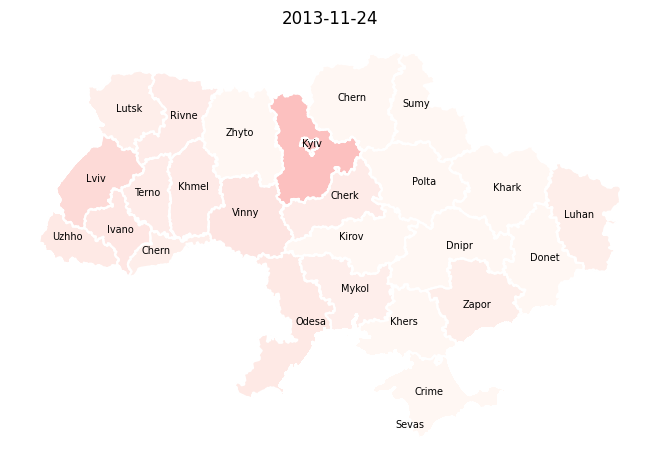

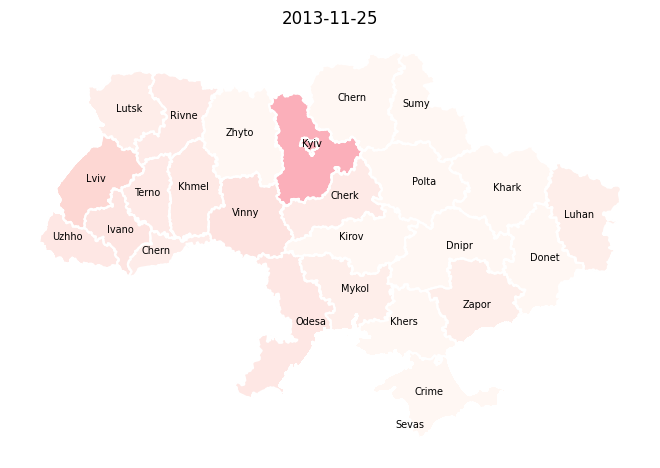

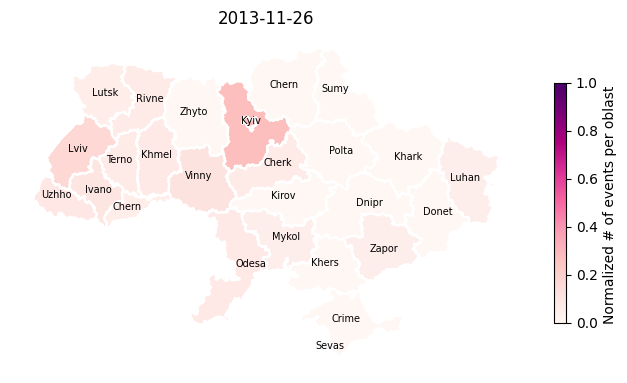

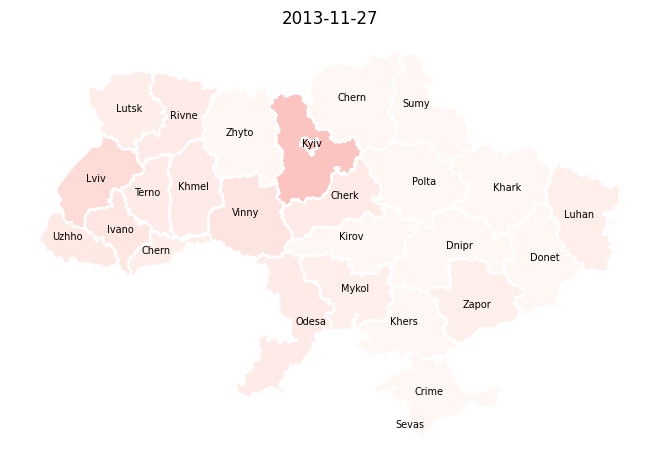

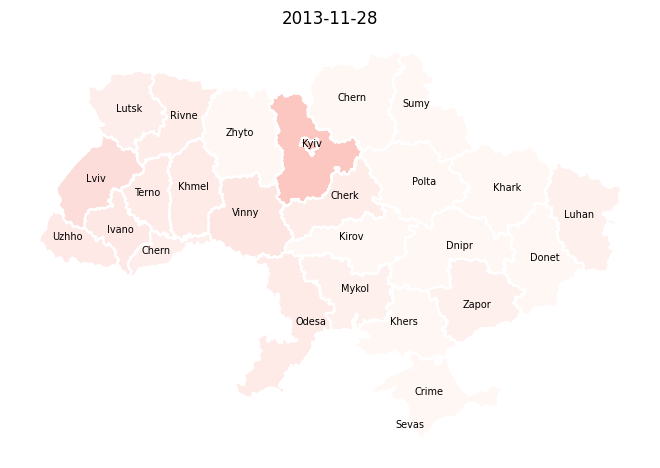

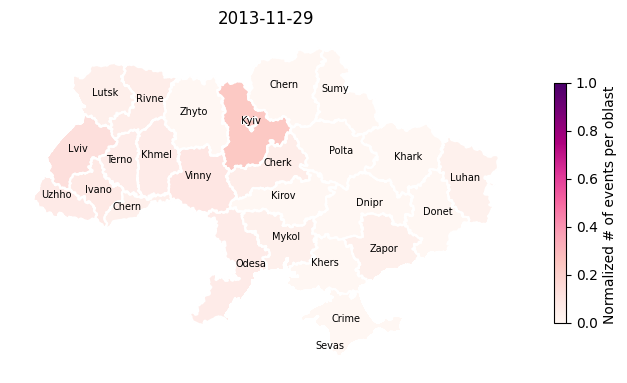

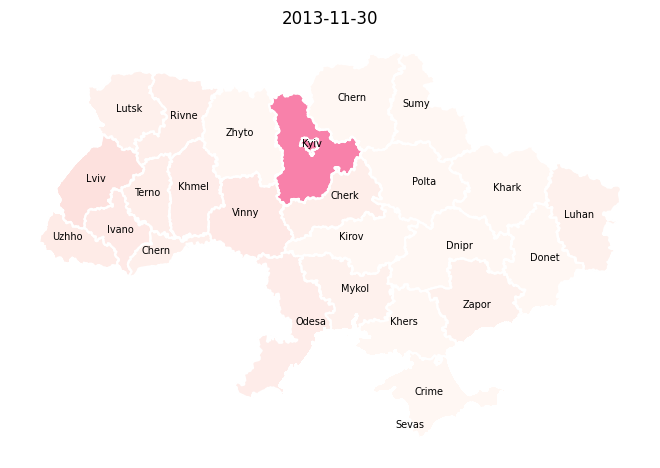

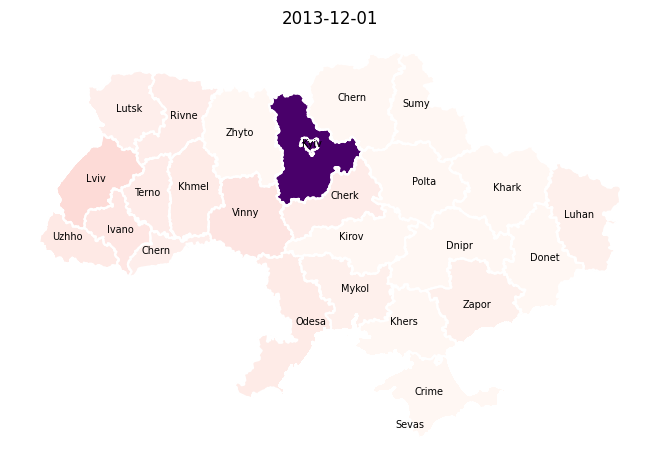

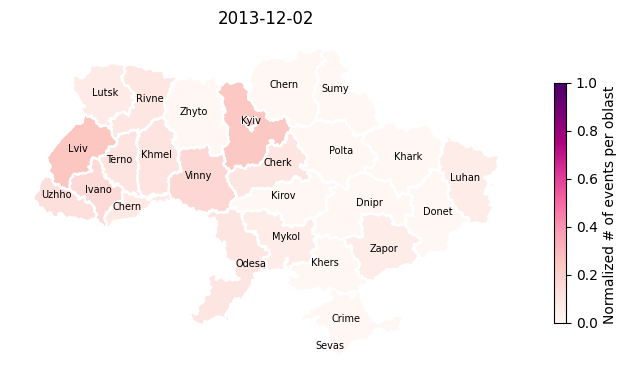

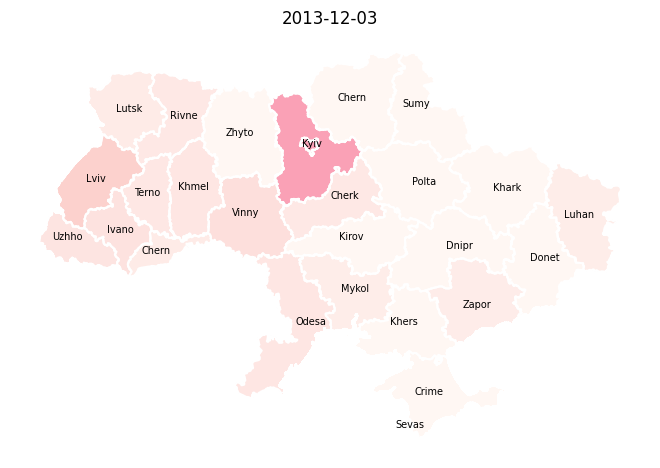

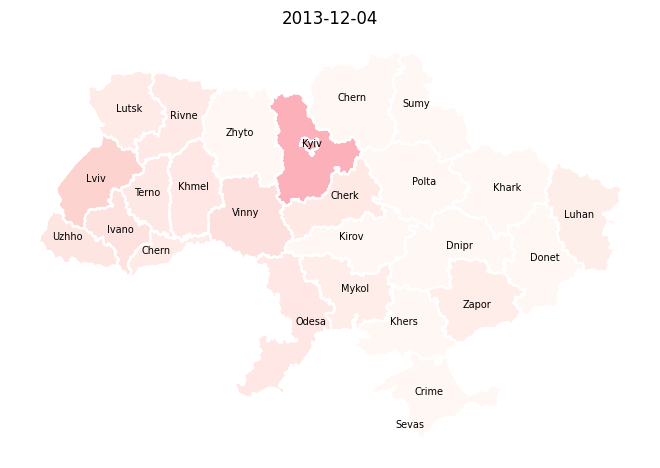

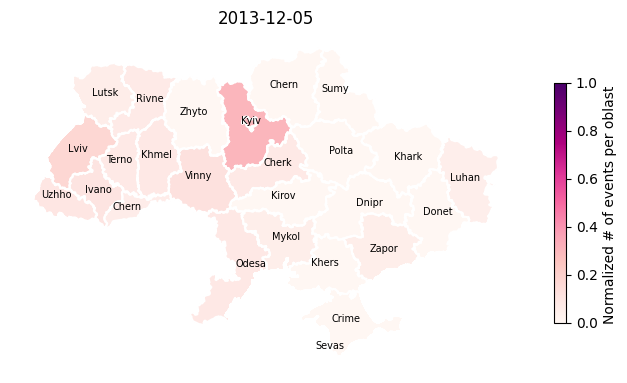

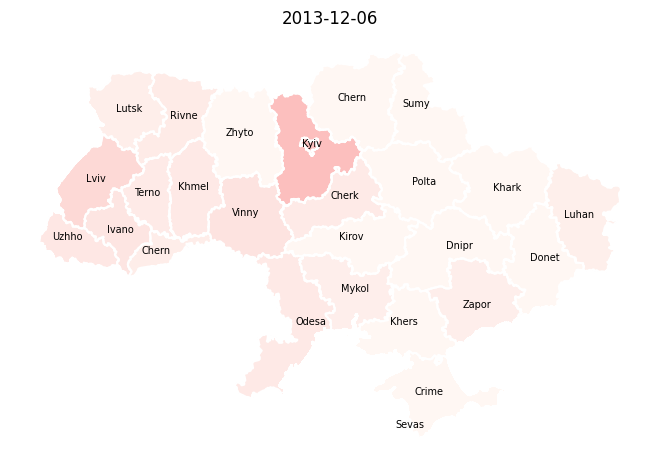

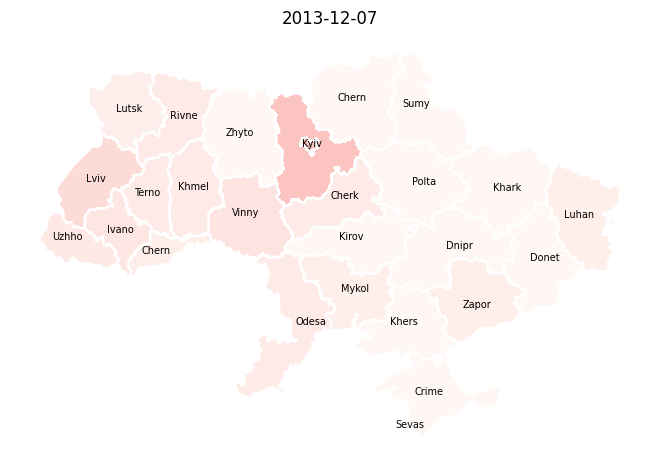

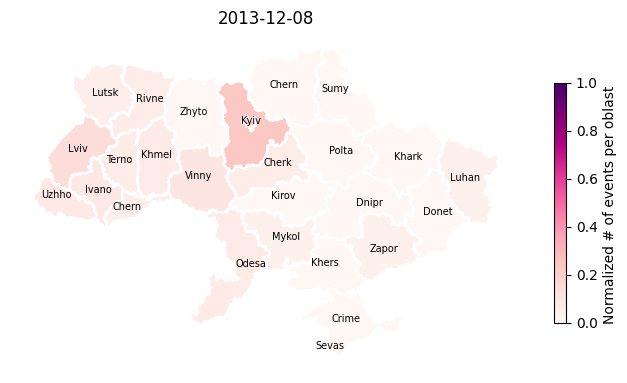

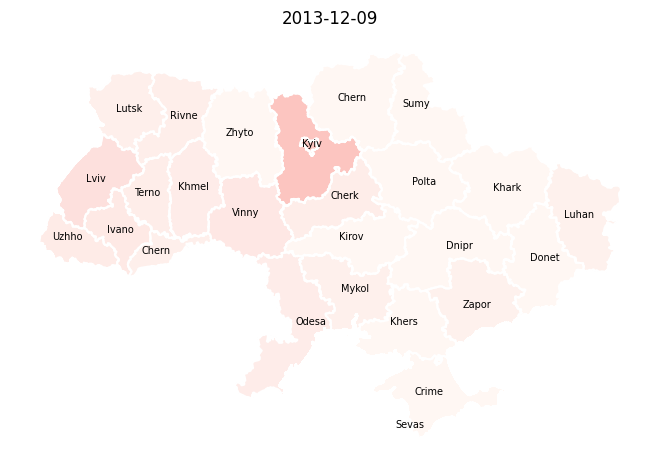

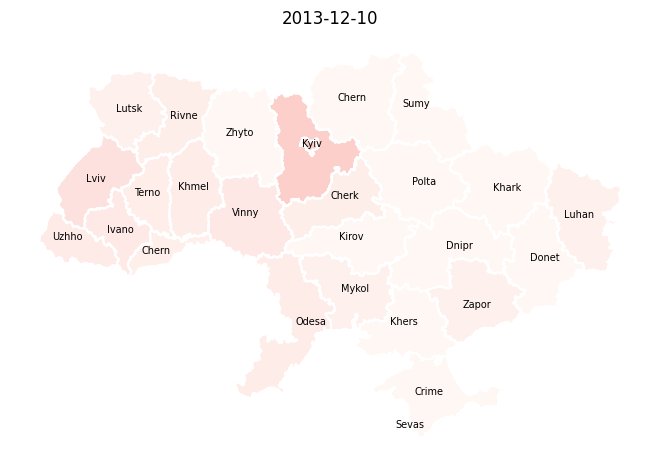

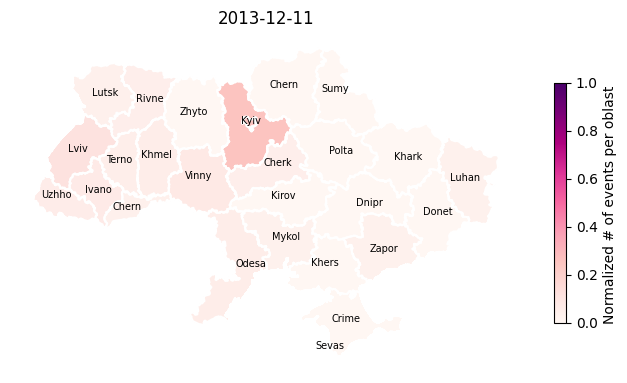

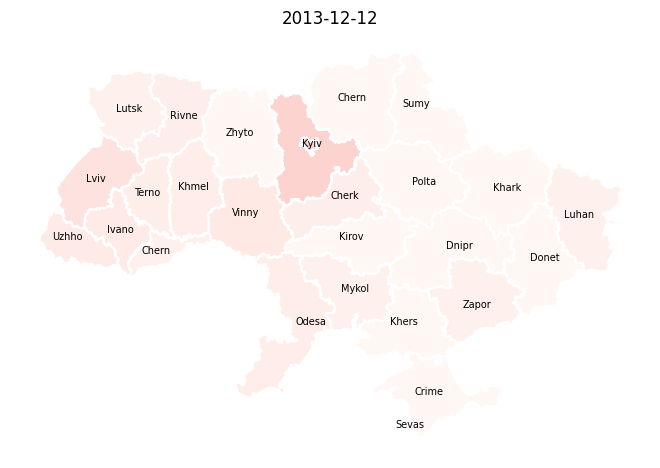

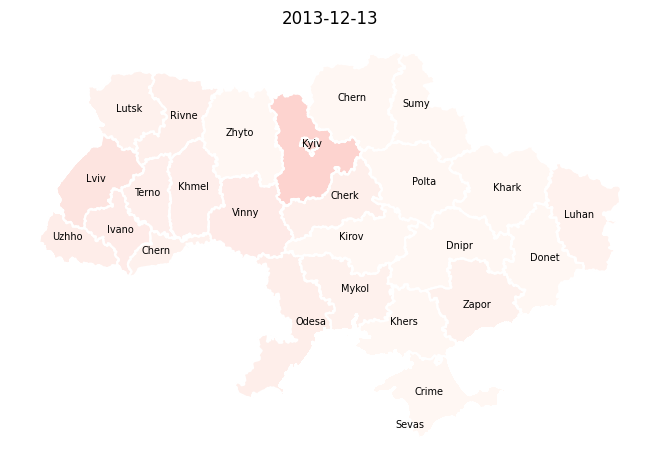

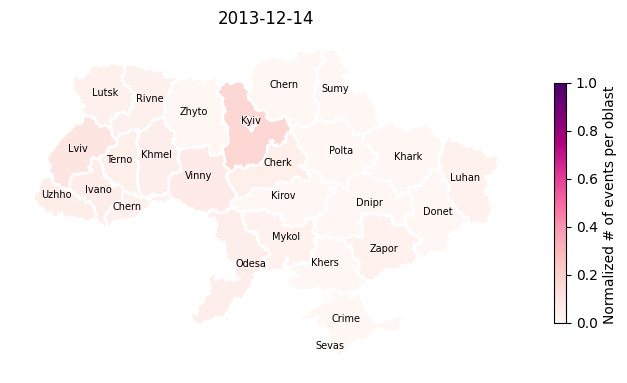

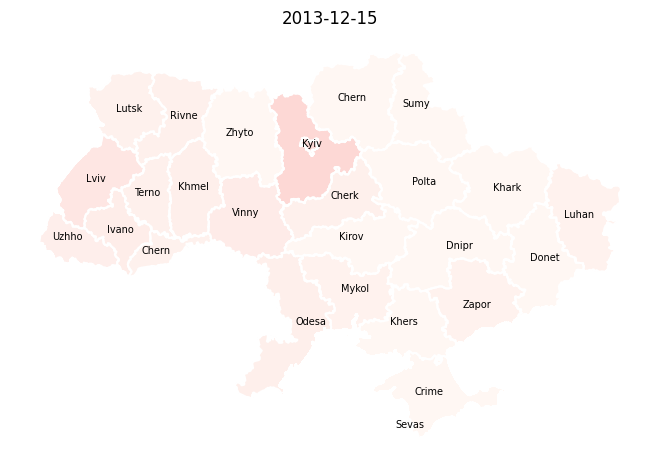

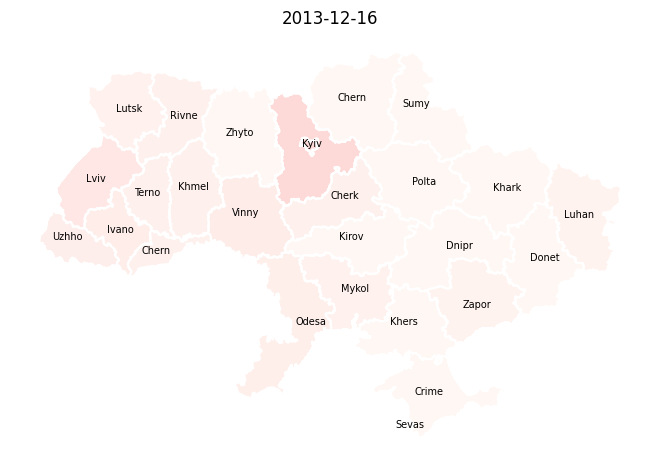

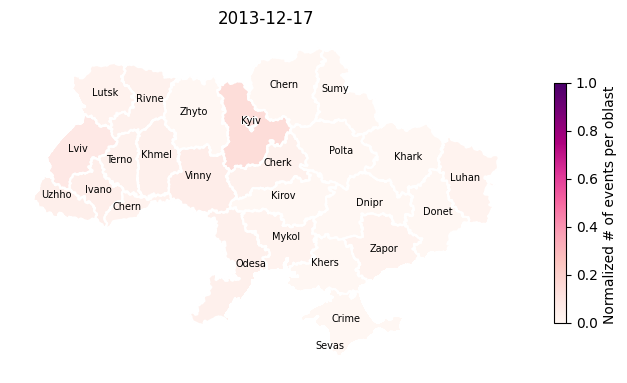

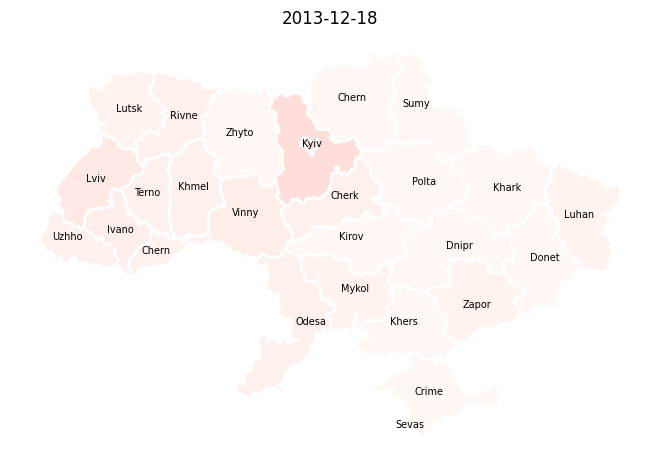

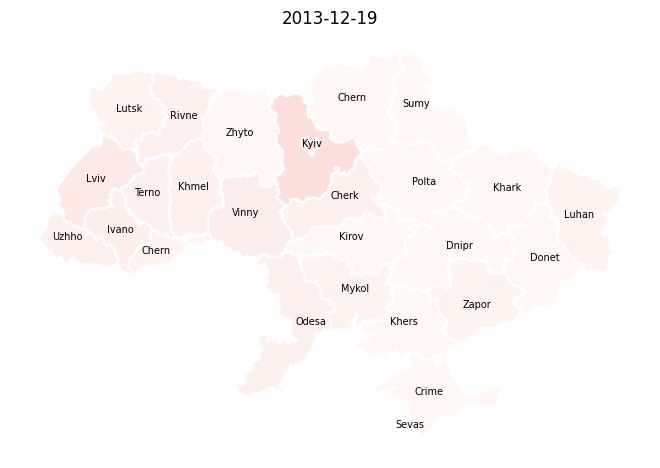

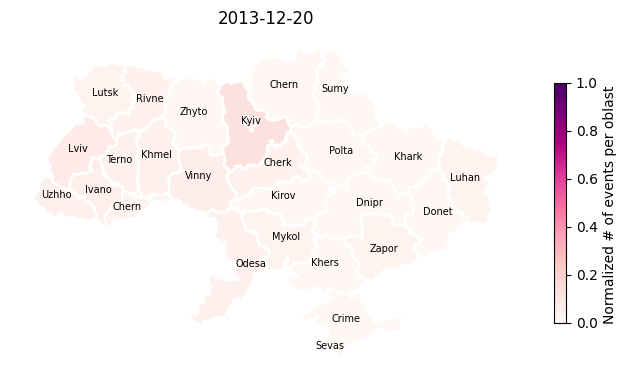

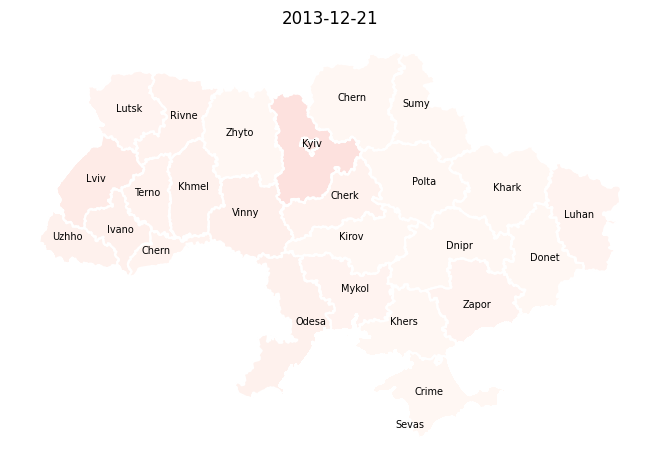

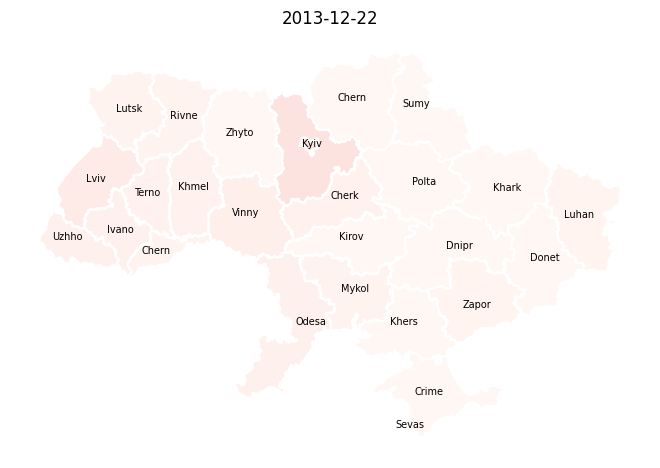

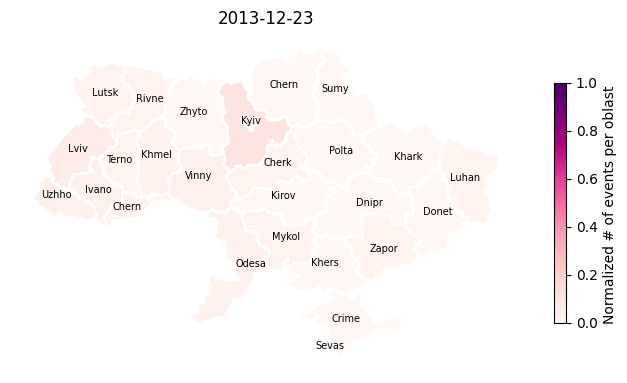

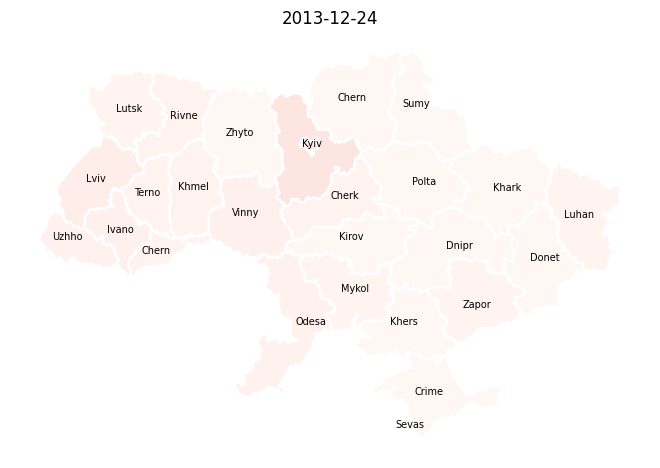

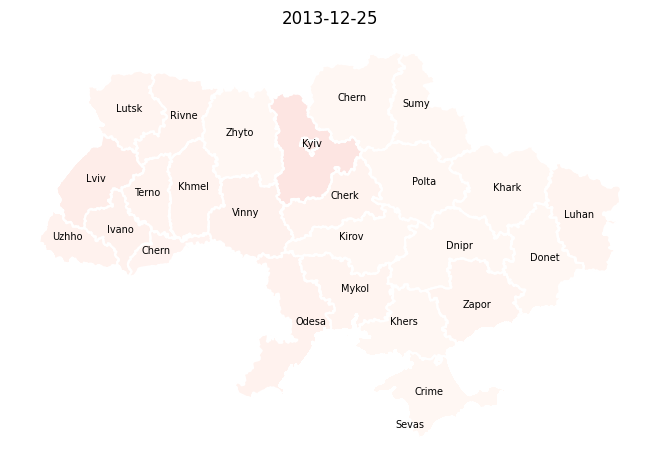

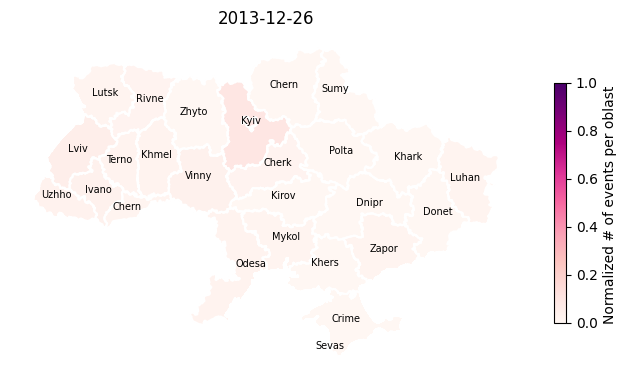

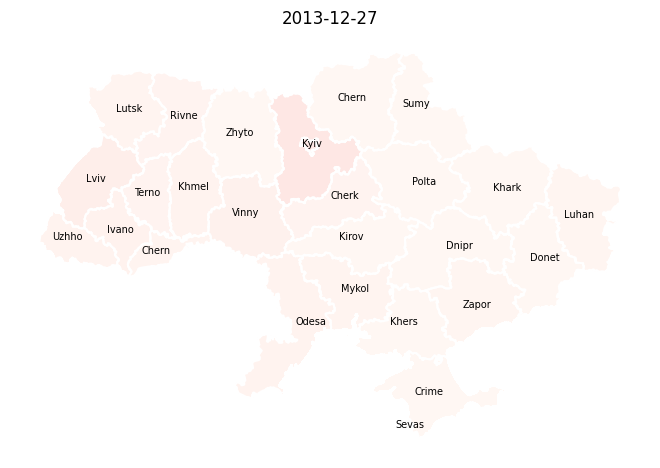

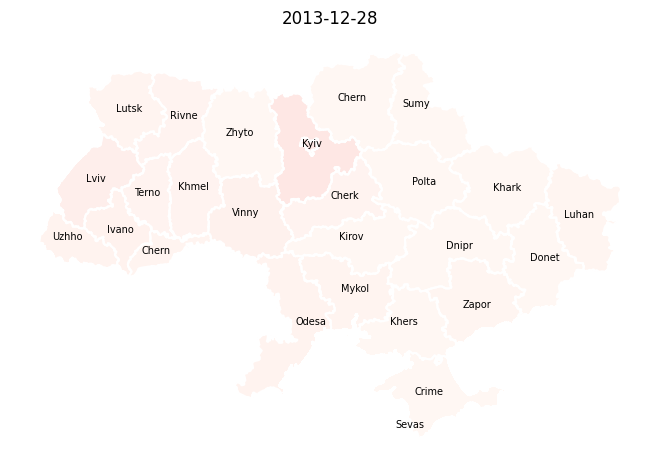

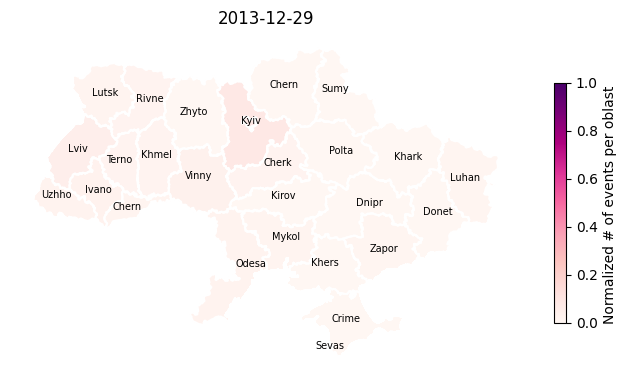

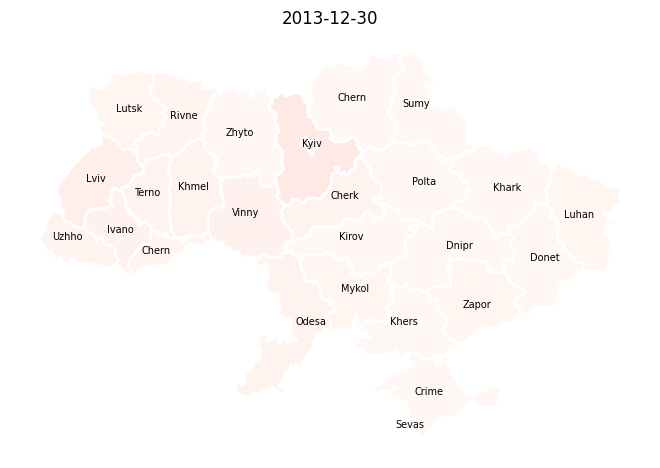

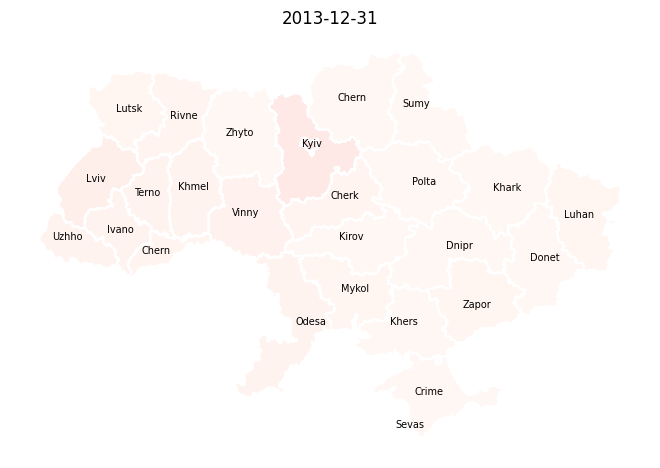

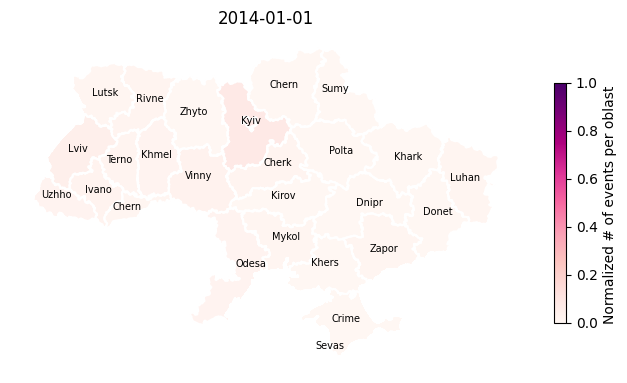

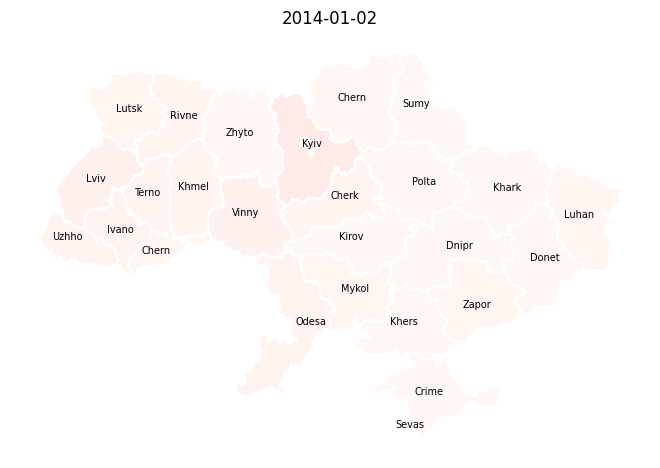

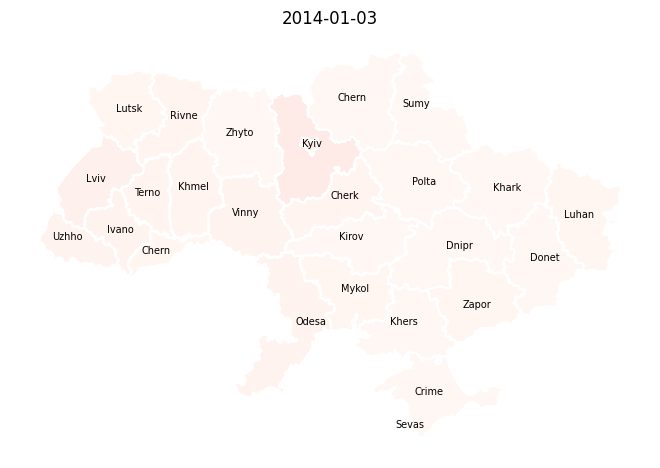

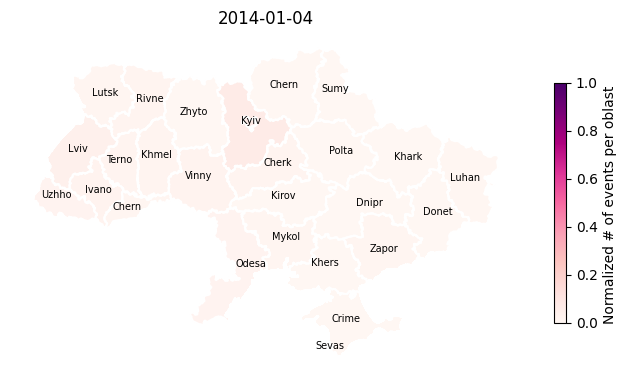

In [116]:
import geopandas 
import json
import fiona
import numpy as np
import pandas as pd
import shapely
from bokeh.io import show, reset_output, output_notebook
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter,
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider, Select)
from bokeh.layouts import column, row#, widgetbox
from bokeh.plotting import figure
from bokeh.transform import linear_cmap, log_cmap
from geopy import Point
from shapely.geometry import Polygon
import numpy as np
from bokeh.plotting import figure
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from matplotlib.widgets import Slider

# %matplotlib notebook


geo_ukraine = geopandas.read_file("data/ukraine.json")
geo_ukraine = geo_ukraine[['id', 'name_1', 'geometry']]


geo_ukraine.head()

### standarizing names:
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Cherkasy", 'Cherkasy')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Chernihiv", 'Chernihiv')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Chernivtsi", 'Chernivtsi')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Crimea", 'Crimea')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Dnipropetrovs'k", 'Dnipropetrovsk')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Donets'k", 'Donetsk')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Kharkiv", 'Kharkiv')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Kherson", 'Kherson')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Khmel'nyts'kyy", 'Khmelnytskyi')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Kiev City", 'Kyiv')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Kiev", 'Kyiv')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Kirovohrad", 'Kirovohrad')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("L'viv", 'Lviv')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Luhans'k", 'Luhansk')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Mykolayiv", 'Mykolaiv')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Odessa", 'Odesa')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Poltava", 'Poltava')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Rivne", 'Rivne')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Sevastopol", 'Sevastopol')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Sumy", 'Sumy')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Ivano-Frankivs'k", 'Ivano-Frankivsk')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Ternopil'", 'Ternopil')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Transcarpathia", 'Uzhhorod')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Vinnytsya", 'Vinnytsia')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Zaporizhzhya", 'Zaporizhzhia')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Zhytomyr", 'Zhytomyr')
geo_ukraine['name_1'] = geo_ukraine['name_1'].replace("Volyn", 'Lutsk')
geo_ukraine = geo_ukraine.rename(columns = {'name_1': 'oblast'})
geo_ukraine['oblast'].unique()

data_table = pd.DataFrame()
days = []
oblast = []
nevent = []
lat = []
long = []
oblast_index = 0
prediction = pd.DataFrame()
[Nsec, t, Tex , c, d, p] = sol[0]
days = []
oblast = []
nevent = []
lat = []
long = []
oblast_index = 0
for ob in oblast_coords.keys():
    if ob != "Ukraine":
        if ob in oblasts:
    # for ob in oblasts:
            oblast_index = np.where(oblasts == ob)[0][0]
            nevent = nevent + list(Nevents(data_array, spiketimes1day, Nsec,t, Tex, c, d, p)[:,oblast_index])
            oblast = oblast + [ob for i in range(0, len(Nevents(data_array, spiketimes1day, Nsec,t, Tex, c, d, p)[:,oblast_index]))]
            days = days + [i for i in range(0, len(Nevents(data_array, spiketimes1day, Nsec,t, Tex, c, d, p)[:,oblast_index]))]
            lat = lat + [oblast_coords[ob][0] for i in range(0, len(Nevents(data_array, spiketimes1day, Nsec,t, Tex, c, d, p)[:,oblast_index]))]
            long = long + [oblast_coords[ob][1] for i in range(0, len(Nevents(data_array, spiketimes1day, Nsec,t, Tex, c, d, p)[:,oblast_index]))]
        else:
            nevent = nevent + [0 for i in range(0,len(Nevents(data_array, spiketimes1day, Nsec,t, Tex, c, d, p)[:,oblast_index]))]
            oblast = oblast + [ob for i in range(0, len(Nevents(data_array, spiketimes1day, Nsec,t, Tex, c, d, p)[:,oblast_index]))]
            days = days + [i for i in range(0, len(Nevents(data_array, spiketimes1day, Nsec,t, Tex, c, d, p)[:,oblast_index]))]
            lat = lat + [oblast_coords[ob][0] for i in range(0, len(Nevents(data_array, spiketimes1day, Nsec,t, Tex, c, d, p)[:,oblast_index]))]
            long = long + [oblast_coords[ob][1] for i in range(0, len(Nevents(data_array, spiketimes1day, Nsec,t, Tex, c, d, p)[:,oblast_index]))]
prediction['day'] = days
prediction['oblast'] = oblast
prediction['Number of events'] = nevent
prediction['lat'] = lat
prediction['long'] = long
mn = prediction['Number of events'].min()
mx = prediction['Number of events'].max()
prediction['Number of events'] = prediction['Number of events'].apply(lambda x: (x - mn) / (mx - mn))
prediction


for day in range (0, len(data['day'].unique())):

    plotting_table= geo_ukraine.merge(prediction[prediction['day'] == day], how='left', on=['oblast','oblast'])

    event_min = prediction['Number of events'].min()
    event_max = prediction['Number of events'].max()
    event_center = (event_min + event_max)/2
    norm = TwoSlopeNorm(vmin=event_min, vcenter=event_center, vmax=event_max)
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    plotting_table.boundary.plot(ax = ax, color = 'white')
    plotting_table.plot(ax=ax, 
                        column='Number of events', 
                        cmap='RdPu', 
                        norm = norm, 
                        legend=day%3 == 2, 
                        legend_kwds={'label': "Normalized # of events per oblast ",
                                    'orientation': "vertical",
                                    'shrink': 0.5},
                        figsize = (20, 10))

    ##getting coordinates for labels:
    plotting_table['coords'] = plotting_table['geometry'].apply(lambda x: x.representative_point().coords[:])
    plotting_table['coords'] = [coords[0] for coords in plotting_table['coords']]
    plotting_table['oblast'] = plotting_table['oblast'].apply(lambda x: x[:5])
    plotting_table['oblast'] = plotting_table['oblast'].to_list()[:10] + [''] + plotting_table['oblast'].to_list()[11:]
    plt.title(str(evendate[day])[:10])
    for idx, row in plotting_table.iterrows():
        plt.annotate(text=row['oblast'], xy=row['coords'],
                                         horizontalalignment='center',
                                        size = 7)
    plt.savefig('results/sptemp/sptemp'+str(day)+'.png')


SyntaxError: invalid syntax (525519296.py, line 1)